In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder

In [2]:
gender = pd.read_csv("gender_vjezba.csv")
odjeli_place = pd.read_csv("odjeli_place.csv")

In [3]:
odjeli_place

,Unnamed: 0,Department,Salary
0,0,Marketing,52483.570765
1,1,Marketing,49308.678494
2,2,Marketing,53238.442691
3,3,Marketing,57615.149282
4,4,Marketing,48829.233126
...,...,...,...
85,85,Sales,51989.457738
86,86,Sales,60492.412706
87,87,Sales,56972.506658
88,88,Sales,51821.438777


In [4]:
### Metoda ANOVA

In [5]:
odjeli_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   Department  90 non-null     object 
 2   Salary      90 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
odjeli_place["Department"].value_counts()

Department
Marketing    30
Logistics    30
Sales        30
Name: count, dtype: int64

In [7]:
odjeli_place_department = odjeli_place.groupby ("Department")

In [8]:
odjeli_place_department ["Salary"].mean()

Department
Logistics    44454.768884
Marketing    49059.265521
Sales        55077.308635
Name: Salary, dtype: float64

(array([ 3.,  8., 11., 12., 18., 12., 10.,  8.,  4.,  4.]),
 array([36181.48444254, 39002.12219178, 41822.75994101, 44643.39769024,
        47464.03543948, 50284.67318871, 53105.31093795, 55925.94868718,
        58746.58643642, 61567.22418565, 64387.86193488]),
 <BarContainer object of 10 artists>)

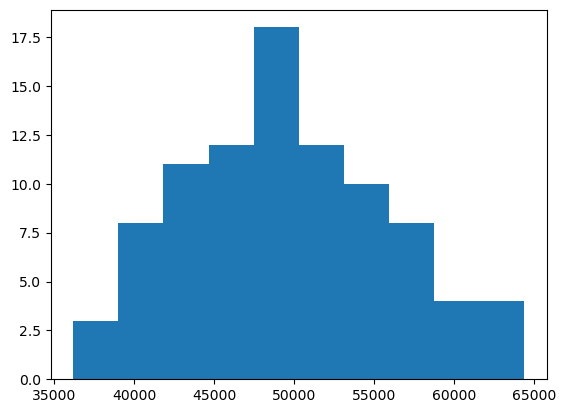

In [9]:
plt.hist(odjeli_place.Salary)

In [10]:
odjeli_place.corr(numeric_only = True)

,Unnamed: 0,Salary
Unnamed: 0,1.00000,0.34113
Salary,0.34113,1.00000


In [11]:
marketing = odjeli_place[odjeli_place['Department'] == 'Marketing']['Salary']
logistics = odjeli_place[odjeli_place['Department'] == 'Logistics']['Salary']
sales = odjeli_place[odjeli_place['Department'] == 'Sales']['Salary']

In [12]:
logistics

30    42292.320245
31    53335.251830
32    44939.262489
33    40240.300820
34    48701.452104
35    39506.203575
36    45939.886178
37    36181.484443
38    39023.162780
39    45885.875561
40    48323.099610
41    45771.157265
42    44479.582729
43    43645.033370
44    38346.651043
45    41760.701062
46    42927.125531
47    49757.050018
48    46546.282303
49    37066.319301
50    46458.377862
51    43267.129738
52    41953.850999
53    47752.543300
54    49639.497851
55    49190.760536
56    41223.521145
57    43608.544309
58    46490.685441
59    49389.953072
Name: Salary, dtype: float64

In [13]:
F_statistic, p_value = stats.f_oneway(marketing, logistics, sales)

In [14]:
F_statistic

np.float64(34.873805599251384)

In [15]:
p_value

np.float64(7.548262426790079e-12)

In [16]:
gender

,Unnamed: 0,Gender,ExerciseFrequency
0,0,Male,6.745071
1,1,Male,5.792604
2,2,Male,6.971533
3,3,Male,8.284545
4,4,Male,5.648770
...,...,...,...
195,195,Female,6.077976
196,196,Female,4.174214
197,197,Female,5.730588
198,198,Female,5.587313


In [ ]:
#### Zadatak

In [17]:
exercise_Frequency = gender.groupby("Gender")

In [20]:
exercise_Frequency ["ExerciseFrequency"].mean()

Gender
Female    5.533457
Male      5.844230
Name: ExerciseFrequency, dtype: float64

(array([ 2., 11., 27., 20., 46., 48., 21., 12., 11.,  2.]),
 array([2.07038234, 2.82136948, 3.57235663, 4.32334377, 5.07433091,
        5.82531805, 6.57630519, 7.32729233, 8.07827947, 8.82926661,
        9.58025375]),
 <BarContainer object of 10 artists>)

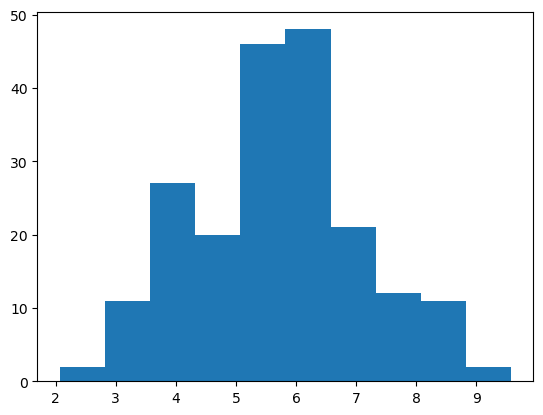

In [19]:
plt.hist(gender.ExerciseFrequency)

In [21]:
muskarci = gender[gender['Gender'] == 'Male']['ExerciseFrequency']
zene = gender[gender['Gender'] == 'Female']['ExerciseFrequency']

In [22]:
F_statistic2, p_value2 = stats.f_oneway(muskarci, zene)

In [23]:
F_statistic2

np.float64(2.475096859950524)

In [24]:
p_value2

np.float64(0.11725885247920977)

In [25]:
#### TWO WAY ANOVA

In [26]:
np.random.seed(42)

In [27]:
departments = np.random.choice(['Marketing', 'Logistics', 'Sales'], 50)
experience_levels = np.random.choice(['Junior', 'Mid', 'Senior'], 50)

In [28]:
salary = np.random.normal(loc=50000, scale=5000, size=50) + \
         (np.where(departments == 'Marketing', 2000, 0)) + \
         (np.where(departments == 'Sales', -3000, 0)) + \
         (np.where(experience_levels == 'Senior', 5000, 0)) + \
         (np.where(experience_levels == 'Junior', -5000, 0))

In [29]:
df = pd.DataFrame({
    'Department': departments,
    'Experience': experience_levels,
    'Salary': salary
})

In [30]:
df

,Department,Experience,Salary
0,Sales,Mid,49910.613974
1,Marketing,Junior,51438.742298
2,Sales,Mid,51471.661651
3,Sales,Junior,45774.988986
4,Marketing,Mid,50964.170549
5,Marketing,Senior,53882.613025
6,Sales,Senior,44459.233552
7,Logistics,Junior,50498.234879
8,Sales,Senior,51111.339394
9,Sales,Senior,49948.083457


In [31]:
df_depart = df.groupby("Department")

In [32]:
df_depart['Salary'].mean()

Department
Logistics    48198.185959
Marketing    54369.758458
Sales        46454.917331
Name: Salary, dtype: float64

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
model = ols('Salary ~ C(Department) + C(Experience) + C(Department):C(Experience)', data=df).fit()

In [39]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [40]:
anova_table

,sum_sq,df,F,PR(>F)
C(Department),3.544608e+08,2.0,7.097703,0.002255
C(Experience),5.870328e+08,2.0,11.754713,0.000092
C(Department):C(Experience),1.016781e+08,4.0,1.017999,0.409391
Residual,1.023774e+09,41.0,NaN,NaN
